In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [41]:
import zipfile

zip_path = r'C:\Users\giria\Downloads\archive.zip'
csv_file = 'city_hour.csv'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_file) as file:
        df = pd.read_csv(file)
print(" File loaded successfully.")
print("Number of rows:", len(df))
print("Columns:", df.columns.tolist())
df.head()



 File loaded successfully.
Number of rows: 707875
Columns: ['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [42]:
df = df[df['City'] == 'Delhi'].copy()


In [43]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['month'] = df['Datetime'].dt.month
df['year'] = df['Datetime'].dt.year
df['day'] = df['Datetime'].dt.day
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [44]:
df.isnull().sum().sort_values(ascending=False)


Xylene        18904
SO2            2852
PM10           2421
O3             2201
NH3             980
AQI_Bucket      498
AQI             498
PM2.5           375
CO              364
NO2             330
NO              298
Benzene          38
Toluene          26
NOx              25
day               0
month             0
year              0
City              0
dayofweek         0
hour              0
Datetime          0
is_weekend        0
dtype: int64

In [45]:
null_threshold = 0.3  
null_percent = df.isnull().mean() 

cols_to_drop = null_percent[null_percent > null_threshold].index  
df.drop(columns=cols_to_drop, inplace=True)

print("Dropped columns:", list(cols_to_drop))


Dropped columns: ['Xylene']


In [46]:
df.drop(columns=['AQI_Bucket'], inplace=True)


In [47]:
df.fillna(df.mean(numeric_only=True), inplace=True)


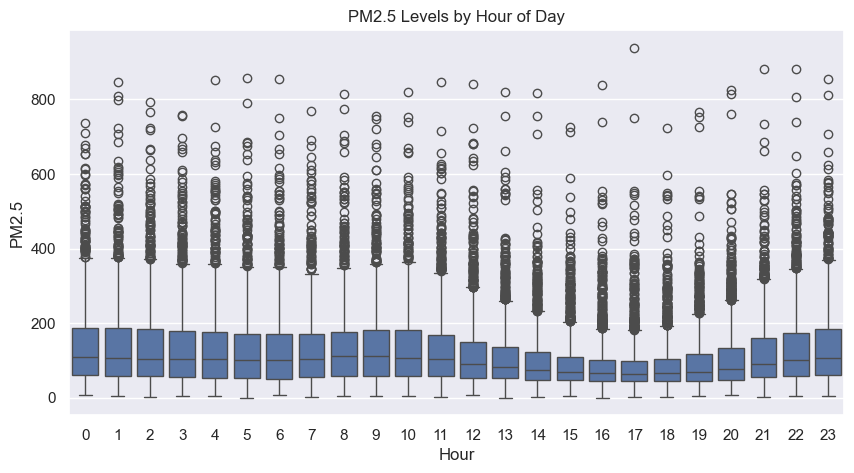

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")  

plt.figure(figsize=(10, 5))  
sns.boxplot(x='hour', y='PM2.5', data=df)  
plt.title('PM2.5 Levels by Hour of Day')  
plt.xlabel('Hour')  
plt.ylabel('PM2.5') 
plt.show()



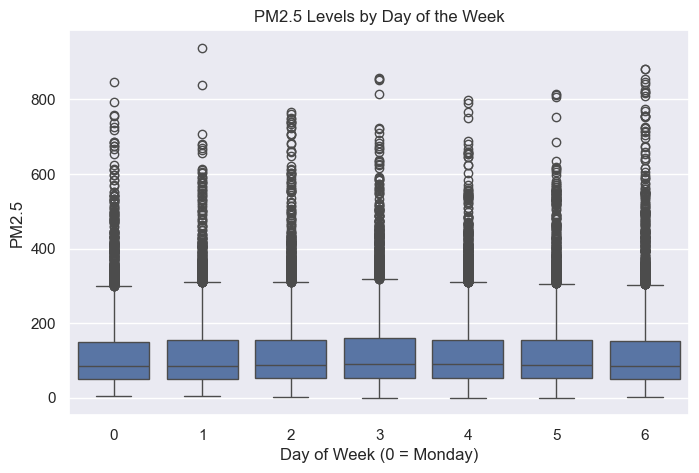

In [49]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='dayofweek', y='PM2.5', data=df)
plt.title('PM2.5 Levels by Day of the Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('PM2.5')
plt.show()


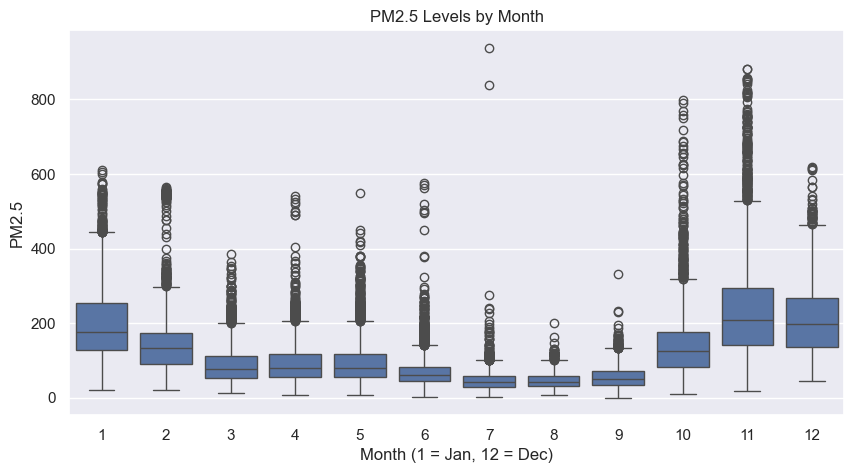

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='PM2.5', data=df)
plt.title('PM2.5 Levels by Month')
plt.xlabel('Month (1 = Jan, 12 = Dec)')
plt.ylabel('PM2.5')
plt.show()

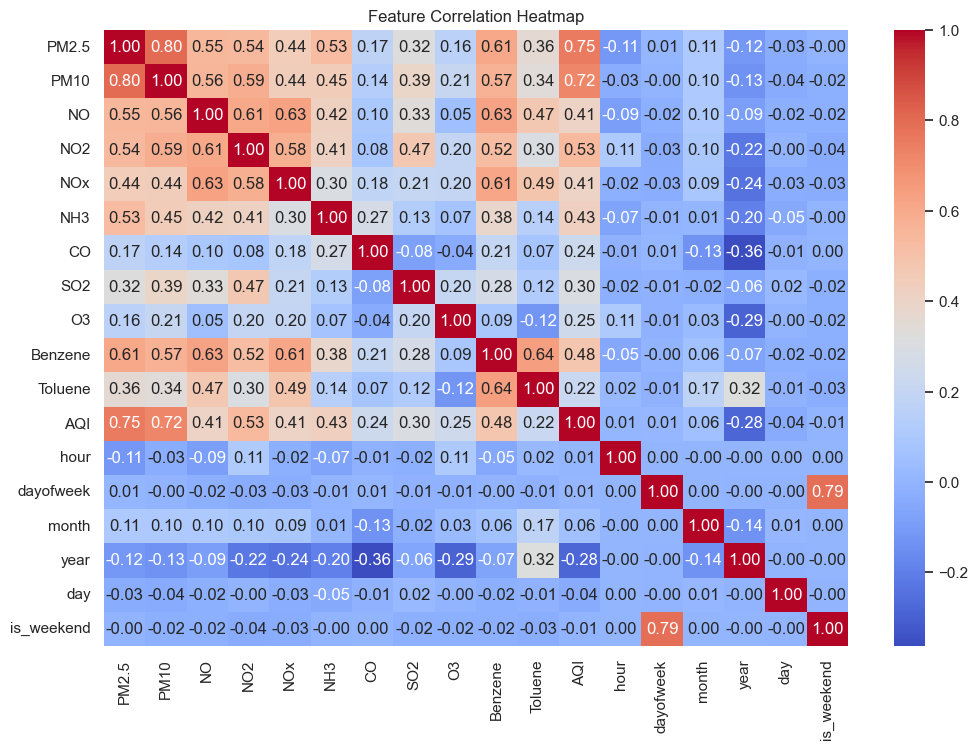

In [51]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

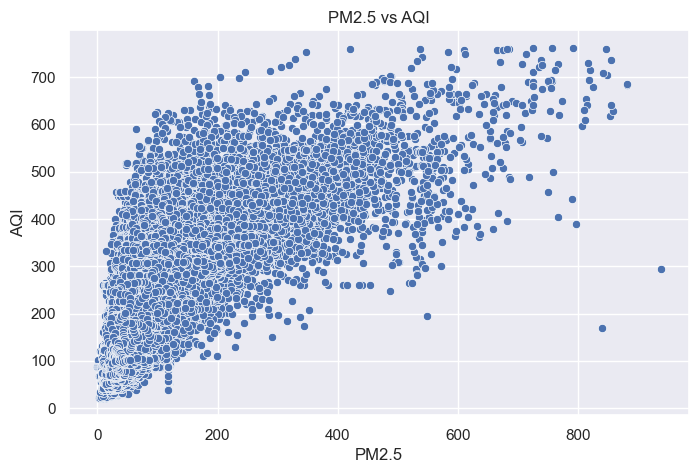

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PM2.5', y='AQI', data=df)
plt.title('PM2.5 vs AQI')
plt.xlabel('PM2.5')
plt.ylabel('AQI')
plt.show()

<Axes: xlabel='PM10', ylabel='AQI'>

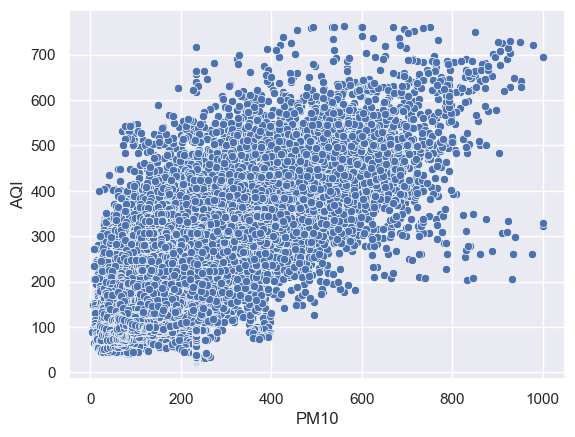

In [53]:
sns.scatterplot(x='PM10', y='AQI', data=df)

<Axes: xlabel='NO2', ylabel='AQI'>

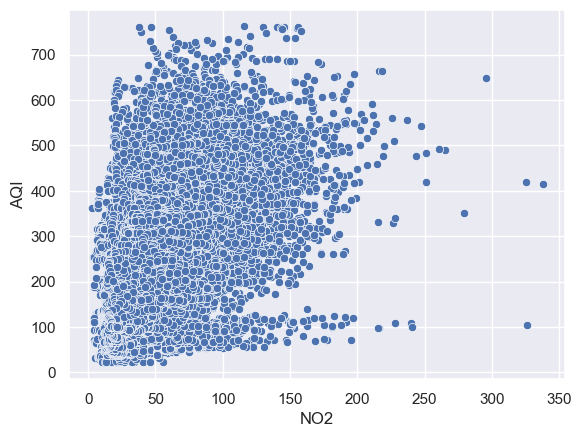

In [54]:
sns.scatterplot(x='NO2', y='AQI', data=df)

<Axes: xlabel='Benzene', ylabel='AQI'>

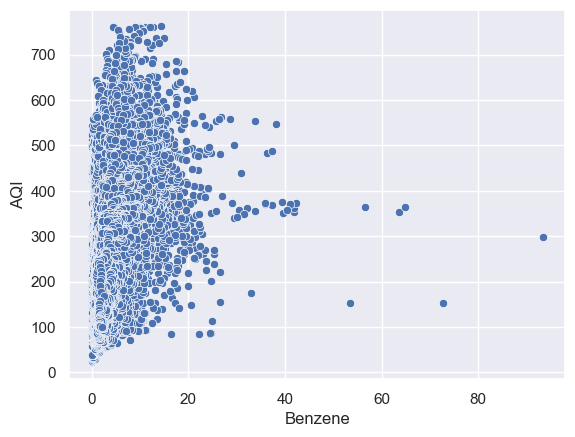

In [55]:
sns.scatterplot(x='Benzene', y='AQI', data=df)

<Axes: xlabel='NO', ylabel='AQI'>

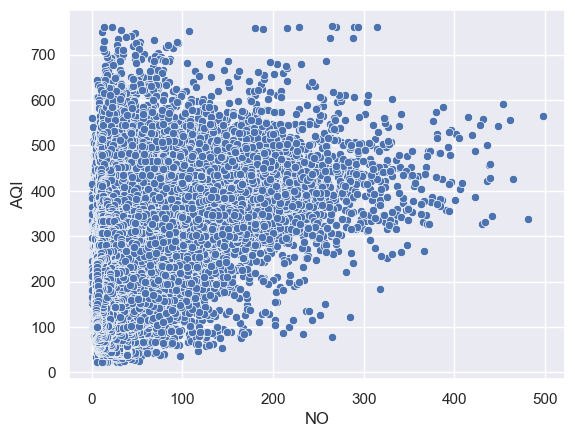

In [56]:
sns.scatterplot(x='NO', y='AQI', data=df)

🔹 Mean Absolute Error (MAE): 59.15
🔹 R² Score: 0.62


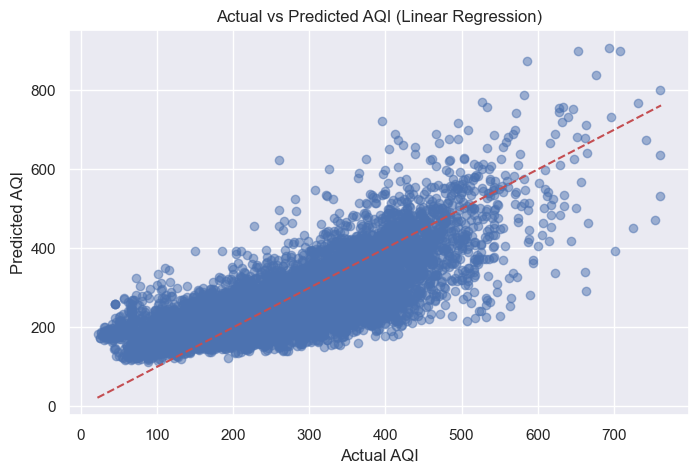

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

features = ['PM2.5', 'PM10', 'NO', 'NO2', 'Benzene']
X = df[features]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔹 Mean Absolute Error (MAE):", round(mae, 2))
print("🔹 R² Score:", round(r2, 2))

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()




 Random Forest Results:
🔹 Mean Absolute Error (MAE): 46.32
🔹 R² Score: 0.74


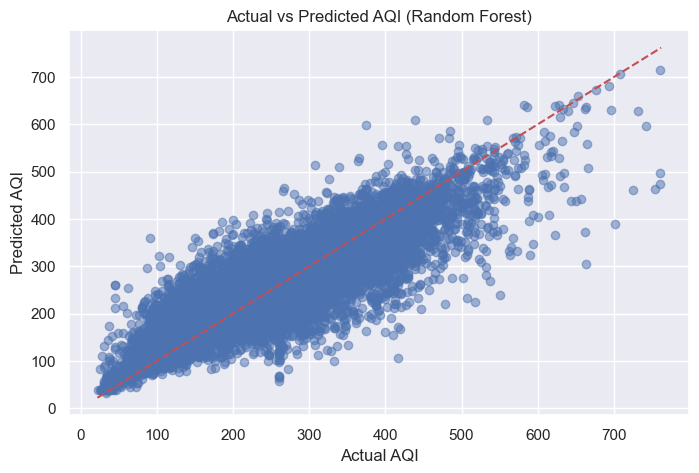

In [60]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'Benzene']
X = df[features]
y = df['AQI']

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')
X = X.dropna()
y = y.loc[X.index]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(" Random Forest Results:")
print("🔹 Mean Absolute Error (MAE):", round(mae_rf, 2))
print("🔹 R² Score:", round(r2_rf, 2))

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Actual vs Predicted AQI (Random Forest)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--') 
plt.grid(True)
plt.show()


C:\Users\giria\AppData\Local\Temp\ipykernel_4752\2539023470.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


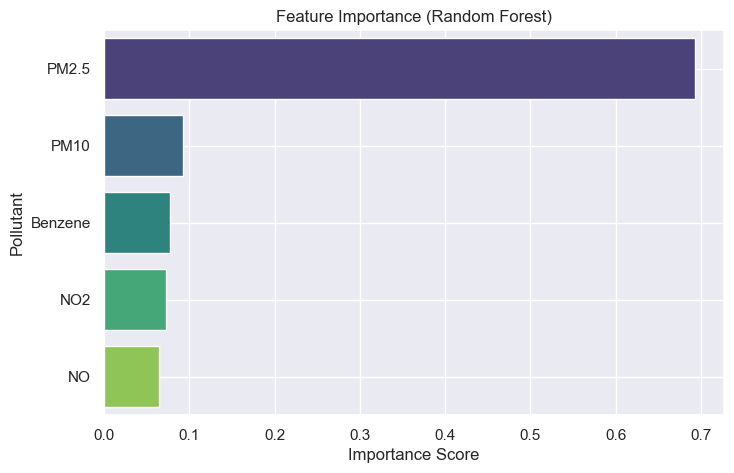

In [61]:

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Pollutant')
plt.grid(True)
plt.show()


In [84]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 1.9 MB/s eta 0:01:21
   ---------------------------------------- 0.5/150.0 MB 1.9 MB/s eta 0:01:21
   ---------------------------------------- 0.8/150.0 MB 1.1 MB/s eta 0:02:19
   ---------------------------------------- 1.3/150.0 MB 1.3 MB/s eta 0:01:53
   ---------------------------------------- 1.6/150.0 MB 1.4 MB/s eta 0:01:49
   ---------------------------------------- 1.8/150.0 MB 1.3 MB/s eta 0:01:52
    --------------------------------------- 2.4/150.0 MB 1.4 MB/s eta 0:01:43
    --------------------------------------- 2.6/150.0 MB 1.5 MB/s eta 0:01:41
    --------------------------------------- 3.1/150.0 MB 1.5 MB/s eta 0:01:36
    --------------------------------------- 3.4/150.0 MB 1.6 MB/s eta 0:01:34
   - --

🔹 MAE (XGBoost): 47.67
🔹 R² Score (XGBoost): 0.73


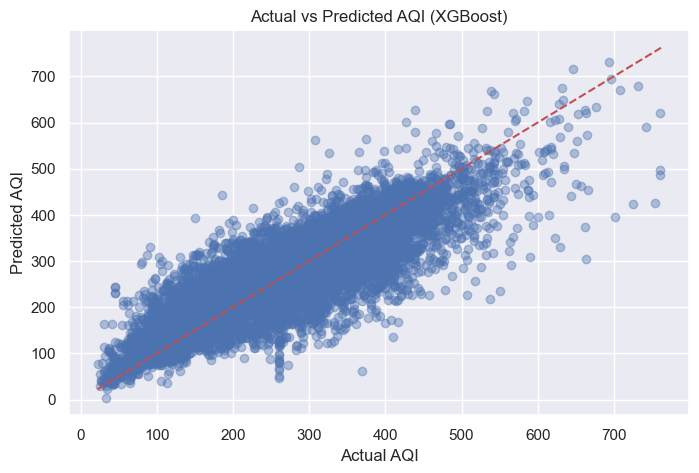

In [85]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

xgb_model = XGBRegressor(n_estimators=100, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"🔹 MAE (XGBoost): {mae_xgb:.2f}")
print(f"🔹 R² Score (XGBoost): {r2_xgb:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Actual vs Predicted AQI (XGBoost)")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(True)
plt.show()


🔹 MAE with Time Features: 36.30
🔹 R² Score with Time Features: 0.83


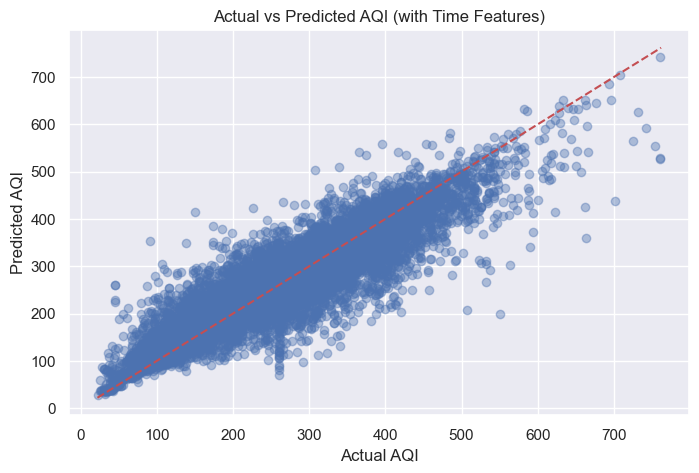

In [86]:

features = ['PM2.5', 'PM10', 'Benzene', 'NO2', 'NO', 'hour', 'dayofweek', 'month', 'is_weekend']

X = df[features]
y = df['AQI']

X = X.dropna()
y = y.loc[X.index]

# Step 4: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔹 MAE with Time Features: {mae:.2f}")
print(f"🔹 R² Score with Time Features: {r2:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Actual vs Predicted AQI (with Time Features)")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(True)
plt.show()


MAE (Gradient Boosting): 44.07
R² Score (Gradient Boosting): 0.77


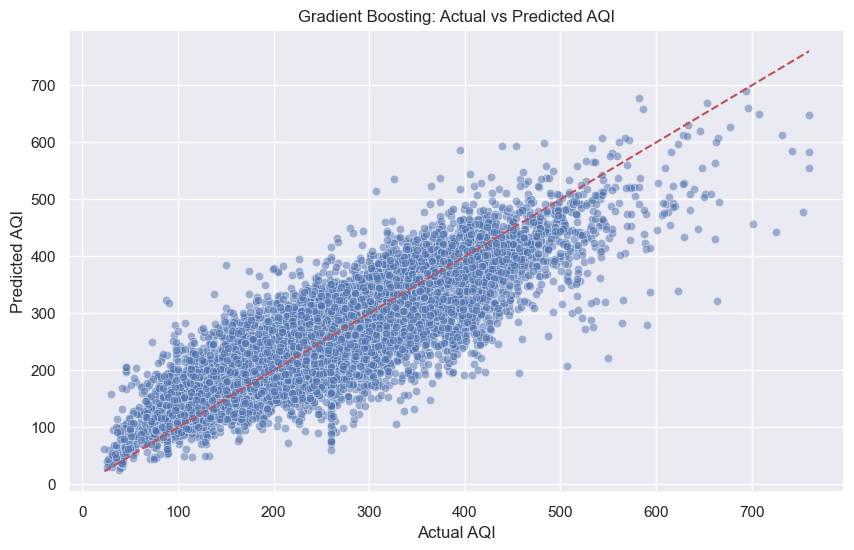

In [90]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

gb_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"MAE (Gradient Boosting): {mae_gb:.2f}")
print(f"R² Score (Gradient Boosting): {r2_gb:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Gradient Boosting: Actual vs Predicted AQI')
plt.show()


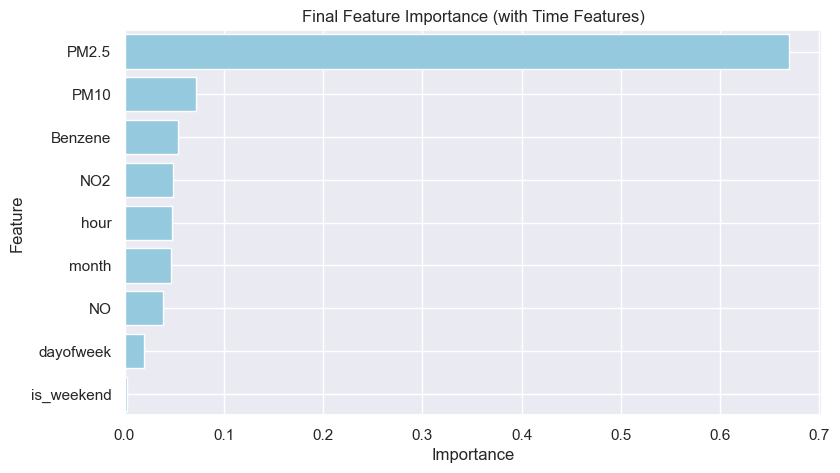

In [87]:
# Re-train the model
final_features = ['PM2.5', 'PM10', 'Benzene', 'NO2', 'NO', 'hour', 'dayofweek', 'month', 'is_weekend']
X = df[final_features]
y = df['AQI']

X = X.dropna()
y = y.loc[X.index]

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(9, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='skyblue')
plt.title('Final Feature Importance (with Time Features)')
plt.grid(True)
plt.show()


In [88]:

df['Datetime'] = pd.to_datetime(df['Datetime'])
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['month'] = df['Datetime'].dt.month
df['year'] = df['Datetime'].dt.year
df['day'] = df['Datetime'].dt.day
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


🔹 Final MAE: 36.28
🔹 Final R² Score: 0.83


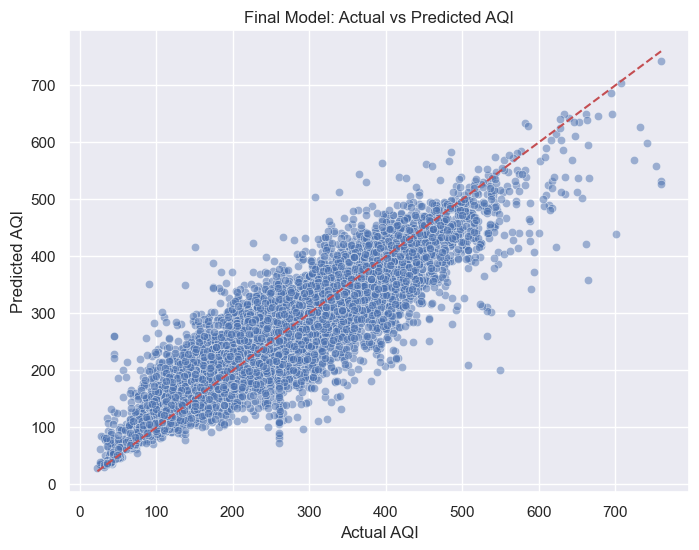

In [89]:

features = ['PM2.5', 'PM10', 'NO', 'NO2', 'Benzene', 'hour', 'dayofweek', 'month', 'is_weekend']
target = 'AQI'

X_final = df[features].copy()
y_final = df[target].copy()
X_final = X_final.dropna()
y_final = y_final.loc[X_final.index]
from sklearn.model_selection import train_test_split

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train_f, y_train_f)

y_pred_f = final_model.predict(X_test_f)

mae_f = mean_absolute_error(y_test_f, y_pred_f)
r2_f = r2_score(y_test_f, y_pred_f)

print("🔹 Final MAE:", round(mae_f, 2))
print("🔹 Final R² Score:", round(r2_f, 2))
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_f, y=y_pred_f, alpha=0.5)
plt.plot([y_test_f.min(), y_test_f.max()], [y_test_f.min(), y_test_f.max()], 'r--')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Final Model: Actual vs Predicted AQI')
plt.show()



In [94]:


print(type(final_model))



<class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [95]:
feature_order = final_model.feature_names_in_.tolist()
print("Expected feature order:", feature_order)


Expected feature order: ['PM2.5', 'PM10', 'NO', 'NO2', 'Benzene', 'hour', 'dayofweek', 'month', 'is_weekend']


In [96]:
import pandas as pd
new_data = pd.DataFrame([[
    250,   # PM2.5
    150,   # PM10
    25,    # NO
    35,    # NO2
    4.2,   # Benzene
    14,    # hour
    4,     # dayofweek
    6,     # month
    0      # is_weekend
]], columns=feature_order) 
predicted_aqi = final_model.predict(new_data)[0]
print("Predicted AQI:", round(predicted_aqi, 2))



Predicted AQI: 339.46


In [97]:
import joblib
joblib.dump(final_model, 'aqi_model.pkl')


['aqi_model.pkl']

In [98]:
import os
os.getcwd()


'C:\\Users\\giria\\anaconda_projects\\1d030812-7753-4783-a561-d68e4c85a784'

In [99]:
import os
print("Saved at:", os.path.abspath("aqi_model.pkl"))



Saved at: C:\Users\giria\anaconda_projects\1d030812-7753-4783-a561-d68e4c85a784\aqi_model.pkl
